#### importing libraries

In [ ]:
import pandas as pd
import json
import numpy as np
import bokeh as bok

# fix this --> json_file1 = json.load('json_test_for_pandas.json')
csv_pyr_trades = pd.read_csv('.\docs\pyr_MRv23_vol100plus_(nov21-sep22).csv') #modify path to match yor location
# the file was being used in xlsx format,now it needs some tlc to be useful again
print(csv_pyr_trades)

reading data

In [2]:
csv_pyr_trades.columns #quick column test

Index(['experiment_id', 'instrument', 'OpenTS per 5 minutes',
       'CloseTS per 5 minutes', 'duration in hours', 'duration in minutes',
       'job_id', 'amount', 'lowest_v', 'highest_v', 'profit_v', 'profit_p',
       'max_DD', 'open_price', 'close_price', 'tp_p', 'Losing streak',
       'Winning streak', 'Transform HH', 'Transform day/night', 'WEST', 'ASIA',
       'total nr of trades', 'AVG trade duration', 'AVG nov-dec',
       'AVG jan-may', 'AVG june-oct', 'profitable trades', 'Losing trades',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31'],
      dtype='object')

only read what I'm interested, for now

In [3]:
#print() is not necessary, but it's going to format it a bit better.
#the downside of print(), it can't be filtered once I read the file.
#try this if you want to filter the results
csv_pyr_trades[['instrument','max_DD','amount','duration in minutes']]

#print(csv_pyr_trades[['instrument','max_DD','amount','duration in minutes']])

,instrument,max_DD,amount,duration in minutes
0,PYRUSDT,-6.10,"1,000",10
1,PYRUSDT,-0.69,"1,029",0
2,PYRUSDT,-1.67,"1,059",10
3,PYRUSDT,-2.66,"1,090",10
4,PYRUSDT,-2.38,"1,087",10
...,...,...,...,...
621,PYRUSDT,-0.07,"26,776",20
622,PYRUSDT,-1.98,"27,559",110
623,PYRUSDT,-0.95,"27,605",30
624,PYRUSDT,-0.69,"28,129",220


In [4]:
## read a particular row
loc0 = csv_pyr_trades[['instrument', 'amount']]
loc0.loc[0]

instrument    PYRUSDT
amount          1,000
Name: 0, dtype: object

In [5]:
## read a specific location (row,col)
csv_pyr_trades.loc[1,'max_DD']

-0.69

#### Sorting / Describing Data

In [ ]:
#read file with builtin statistics
csv_pyr_trades.describe(percentiles='winning_streak')
#error 

In [ ]:
#read a column not showing the full rows, just the top & bottom
print(csv_pyr_trades['amount'])

0       1,000
1       1,029
2       1,059
3       1,090
4       1,087
        ...  
621    26,776
622    27,559
623    27,605
624    28,129
625    28,696
Name: amount, Length: 626, dtype: object


In [ ]:
#read all rows of a particular column
csv_pyr_trades['amount']

In [ ]:
#read specific row values & for every column, selected by row's crt.nr
csv_pyr_trades.loc[625]

In [ ]:
#select specific column to be the index of a new df
df = csv_pyr_trades.set_index('Winning streak')

In [ ]:
#read every row that has the desired value
df.loc[9]

#### Subsetting Data

In [ ]:
#nr of rows and column
df.shape

In [ ]:
#only show the columns selected in this list
csv_pyr_trades[['amount','profit_p','max_DD','Losing streak','Winning streak']]

In [ ]:
#create new df with only columns of interest
short_version_of_csv = csv_pyr_trades[['amount','profit_p','max_DD','Losing streak','Winning streak']]

In [ ]:
#only show the first 5 rows of this df
short_version_of_csv

In [ ]:
#read only profit_p for visualization
profit_p = csv_pyr_trades[('profit_p')]

<AxesSubplot: >

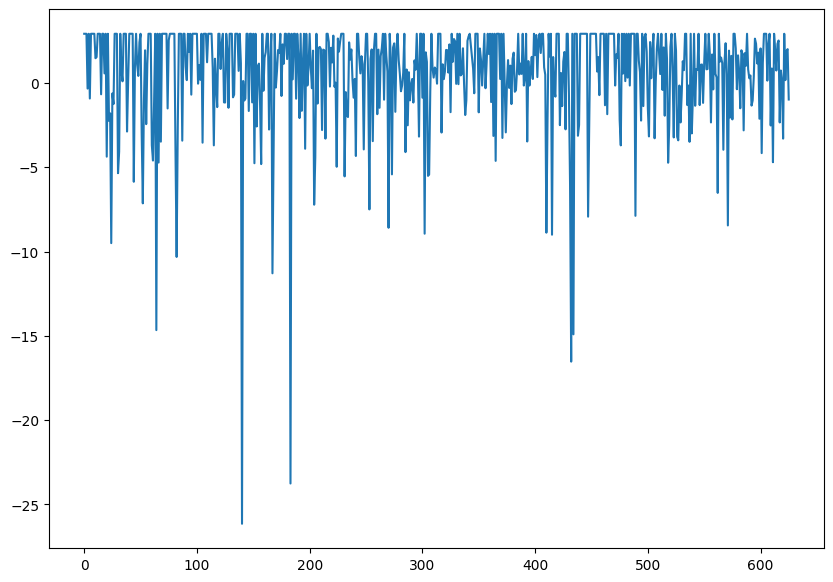

In [ ]:
#profit_p linechart pandas viz
profit_p.plot(figsize=(10,5))

In [ ]:
# winning and losing streak as an area
losing_streak = csv_pyr_trades[('Losing streak')]
winning_streak = csv_pyr_trades[('Winning streak')]
all_trades = winning_streak+losing_streak

array([<AxesSubplot: >], dtype=object)

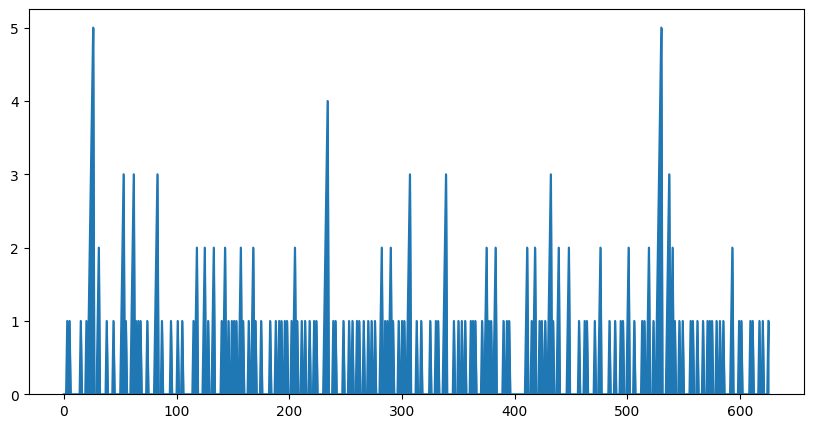

In [ ]:
losing_streak.plot.area(figsize=(10,5), subplots=True)

array([<AxesSubplot: >], dtype=object)

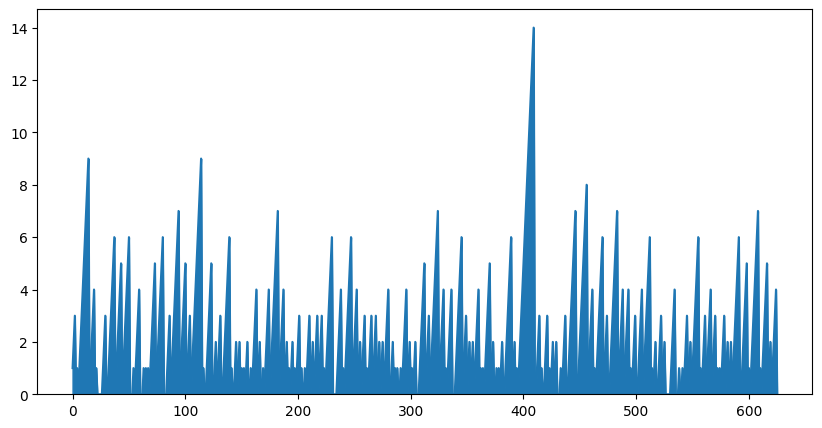

In [ ]:
winning_streak.plot.area(figsize=(10,5), subplots=True)

array([<AxesSubplot: >], dtype=object)

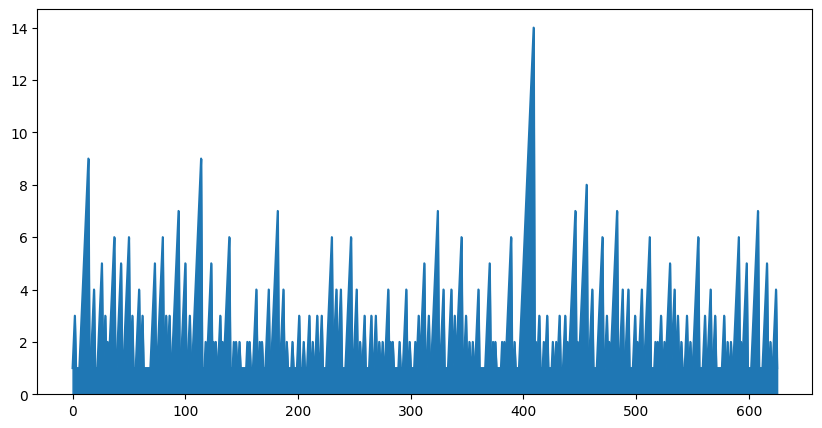

In [ ]:
all_trades.plot.area(figsize=(10,5), subplots=True)

array([<AxesSubplot: >], dtype=object)

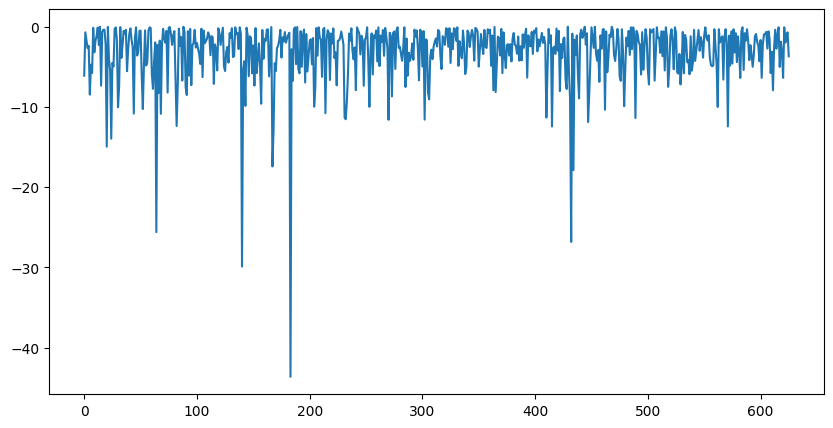

In [ ]:
plot_maxDD = csv_pyr_trades[('max_DD')]
plot_maxDD.plot.line(figsize=(10,5), subplots=True)

In [ ]:
plot_duration_in_minutes = short_version_of_csv[('amount')]
plot_duration_in_minutes.plot.bar(figsize=(10,5), subplots=True)
# amount is str, needs to be int. fix tomorrow

In [ ]:
csv_pyr_trades= csv_pyr_trades[['CloseTS per 5 minutes','amount','instrument','duration_in_minutes']]
csv_pyr_trades.sort_values(by='amount', ascending=True)
df_top_performer = csv_pyr_trades.groupby(by='instrument')
df_top_performer.amount.plot(kind='line')
plt.xlabel('CloseTS per 5 minutes')
plt.ylabel('amount')

In [ ]:
# delete unnecesary columns
csv_pyr_trades.drop(columns=[
    'Unnamed: 28',
    'Transform HH',
    'AVG trade duration',
    'AVG trade duration',
    'AVG nov-dec',
    'AVG june-oct',
    'AVG jan-may',
    'Transform day/night',
    'job_id',
    ], axis=1)

In [ ]:
#rename long names
csv_pyr_trades.rename(columns={'CloseTS per 5 minutes':'closeTS', 'OpenTS per 5 minutes':'OpenTS'})

In [ ]:
describe_trades_columns = set(csv_pyr_trades.columns) - {'experiment_id','Unnamed: 28', 'Transform HH', 'Transform day/night', 'job_id','AVG jan-may','AVG june-oct','AVG nov-dec'}
new_csv_pyr_trades = csv_pyr_trades[list(describe_trades_columns)]
new_csv_pyr_trades.describe()
# csv_pyr_trades.describe(exclude=['experiment_id'])